<a href="https://colab.research.google.com/github/evangelav/Machine_Learning/blob/main/BIN3100_ML_S10_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIN3100 ML S10: Projet

##Vidéos obligatoires
Nous vous demandons de regarder et de comprendre les vidéos suivantes:

1.   [Introduction au réseau de neurones convolutionnel (16:27)](https://www.youtube.com/watch?v=Qy4BjZeoPxc)
2.   [Réseau de neurones convolutionnel (23:01)](https://www.youtube.com/watch?v=XEyArgAEcR0)
3.   [Convolution et pooling sur Pytorch (09:35)](https://www.youtube.com/watch?v=BZiqQWKBBrM)
4.   [Démo-convolution](https://jbdel.github.io/teaching/nn2019/ressources/conv-demo/index.html)
5.   [GPU sur Colab (07:20)](https://www.youtube.com/watch?v=qAOywJjRtYc)

##Tâches

Dans ce projet, nous vous demandons de contruire, **par groupe de un ou deux étudiants**, un classificateur d'images représentants des panneaux routiers. 

Pour construire ce classificateur, vous disposez du fichier IA_Projet_Etudiant_2021.zip qui contient toutes les données suivantes:

1. Un fichier "train_set.csv" contenant des informations sur les images d'entrainement (cf. [train_set.csv](#train_set.csv)). **Par exemple, il permet de se rendre compte que les images n'ont pas toutes la même taille.**
2. Le répertoire "train_set" qui contient les images d'entrainement (cf. [train_set](#train_set)).
3. Le fichier "train_set.csv" et le répertoire "train_set" permettent de découvrir les 43 classes de panneaux (cf. [Les 43 classes](#43classes)).
4. Un fichier "test_set.csv" contenant des informations sur les images dont les classes sont inconnues (cf. [test_set.csv](#test_set.csv)).
5. Le répertoire "test_set" qui contient les images dont les classes sont inconnues (cf. [test_set](#test_set)).
6. Le fichier "y_ex.csv" qui est un exemple d'un fichier contenant de prédictions. Il est généré aléatoirement. (cf. [y_ex.cvs](#y_ex))

**Nous vous demandons de construite un classificateur qui prend en entrée une image et qui prédit à quelle classe est associée cette image. Ce classificateur doit avoir la meilleur "accuracy" possible.**

**De plus, nous vous demandons de prédire la classe des 10000 images de test. Pratiquement, nous vous demandons de générer un fichier "y_pred.csv" similaire à "y_ex.csv". Pour chaque image du fichier "test_set.csv", votre fichier "y_pred.csv" doit contenir une ligne indiquant uniquement la classe de l'image. L'ordre des images du fichier "test_set.csv"  et du fichier du fichier "y_pred.csv" doit être le même.**

**Enfin, nous vous demandons de construire un document d'une face A4 expliquant votre démarche de travail et une face A4 expliquant vos résultats. Ce document doit contenir au moins un schéma et du texte**


##Livrables

Pour le dimanche **05/12/2021 à 23h59**, nous vous demandons de poster, sur mooVin, un fichier **zip** contenant: 

1. Le lien vers le **Google Colab** de votre projet. 

  a. Indiquez votre nom dessus.

  b. Il doit être modifiable en écriture pour pouvoir être testé.

2. Le fichier "**y_pred.csv**"

3. Le **document** expliquant votre démarche de travail et votre modèle.

##Dataset

1. **Downloader** les images, cad le fichier IA_Project_Etudiant_2021.zip



In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-jWl6Cbq4vGifRZP8hQg5IHhLboNuk_e' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-jWl6Cbq4vGifRZP8hQg5IHhLboNuk_e" -O IA_Projet_Etudiant_2021.zip && rm -rf /tmp/cookies.txt

IA_Projet_Etudiant_ 100%[===================>] 305.74M  90.7MB/s    in 3.4s    


2. **Dézipper** le fichier IA_Project_2021.zip dans le répertoire **data**

In [ ]:
!rm -r -f data
!mkdir data
!unzip -d data IA_Projet_Etudiant_2021 1>/dev/null

3. **Combien d'images** dans train_set et test set?



In [ ]:
!find data/train_set  -name "*.png" | wc -l && find data/test_set  -name "*.png" | wc -l

41839
10000


4. On génère le fichier **"y_ex.csv"**. Il ne contient que des valeurs aléatoires
<a name="y_ex"></a>

In [ ]:
import random as rand
import pandas as pd 

xs = [rand.randint(0, 42) for i in range(10000)]

df = pd.DataFrame(xs)
df.to_csv("./data/y_ex.csv", header=None, index=False)

##Train Set

<a name="train_set.csv"></a>
###train_set.csv


In [ ]:
import pandas as pd

df_train = pd.read_csv('data/train_set.csv')
df_train

Width  Height  Roi.X1  ...  Roi.Y2  ClassId               Path
0         38      47       5  ...      42       15  Panneau_23370.png
1         36      36       6  ...      31       14  Panneau_22895.png
2        100      94       9  ...      86       26  Panneau_30238.png
3         38      41       5  ...      36       14  Panneau_40632.png
4         50      46       6  ...      41       28  Panneau_41609.png
...      ...     ...     ...  ...     ...      ...                ...
41834     37      35       5  ...      30       13  Panneau_21243.png
41835     85      76       7  ...      70       13  Panneau_45891.png
41836     34      37       5  ...      32        9  Panneau_42613.png
41837     31      26       6  ...      21       13  Panneau_43567.png
41838     27      26       5  ...      21        2  Panneau_02732.png

[41839 rows x 8 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41839 entries, 0 to 41838
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    41839 non-null  int64 
 1   Height   41839 non-null  int64 
 2   Roi.X1   41839 non-null  int64 
 3   Roi.Y1   41839 non-null  int64 
 4   Roi.X2   41839 non-null  int64 
 5   Roi.Y2   41839 non-null  int64 
 6   ClassId  41839 non-null  int64 
 7   Path     41839 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.6+ MB


<a name="train_set"></a>
###Le répertoire train_set

100 images aléatoires du répetoire "train_set" (relancez pour avoir d'autres exemples)

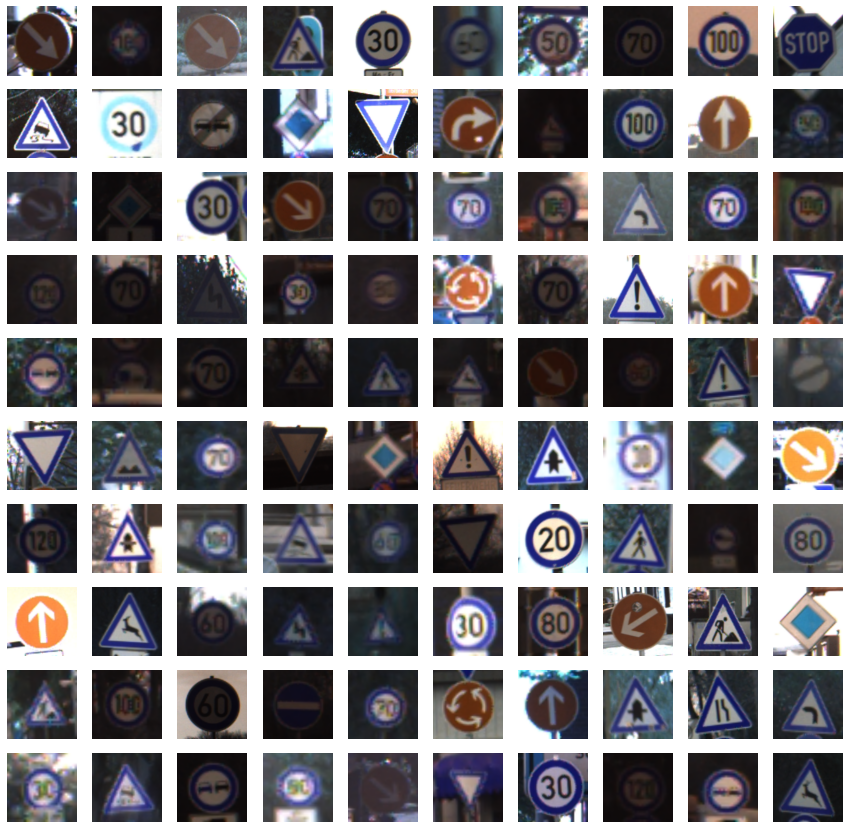

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import os

root = os.path.join('data','train_set')
plt.figure(figsize=([15, 15]))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  random_file=random.choice(os.listdir(root))
  img = cv2.imread(os.path.join(root, random_file))
  plt.imshow(cv2.resize(img, (200,200)))

<a name="43classes"></a>
###Les 43 classes

6 images aléatoires du répetoire "train_set" pour chaque classe (relancez pour avoir d'autres exemples)

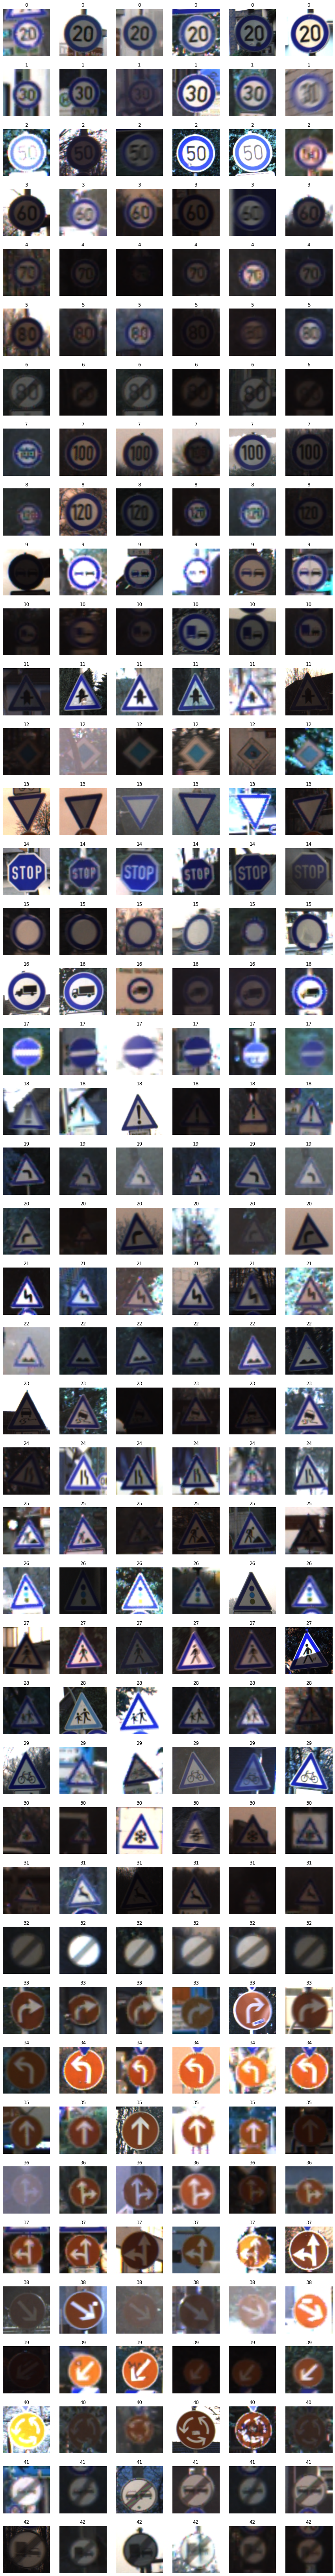

In [ ]:
classes = df_train["ClassId"].unique()
classes.sort()
classes

root = os.path.join('data','train_set')
plt.figure(figsize=([15, 120]))
id = 1;
for i in classes:
  for j in range (6):  
    plt.subplot(len(classes), 6, id)
    plt.axis('off')
    s = df_train[df_train["ClassId"] == i].sample()
    img = cv2.imread(os.path.join(root, s.iloc[0]['Path']))
    plt.imshow(cv2.resize(img, (200,200)))
    plt.title(i)
    id = id + 1

##Prédictions

<a name="test_set.csv"></a>
### test_set.csv


In [ ]:
import pandas as pd

df_test = pd.read_csv('data/test_set.csv')
df_test

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2               Path
0        37      35       5       6      32      30  Panneau_13094.png
1        75      81       7       7      69      74  Panneau_08218.png
2        27      27       5       6      22      22  Panneau_25202.png
3        45      45       6       6      40      40  Panneau_07460.png
4        39      36       5       5      34      31  Panneau_17203.png
...     ...     ...     ...     ...     ...     ...                ...
9995     27      28       5       6      21      23  Panneau_38911.png
9996     41      41       5       5      36      36  Panneau_23210.png
9997     72      68       6       6      65      62  Panneau_49420.png
9998     32      33       5       5      27      28  Panneau_03131.png
9999     81      81       7       7      74      74  Panneau_41251.png

[10000 rows x 7 columns]

###Le répertoire test_set
<a name="test_set"></a>
100 images aléatoires du répetoire "test_set" (relancez pour avoir d'autres exemples)

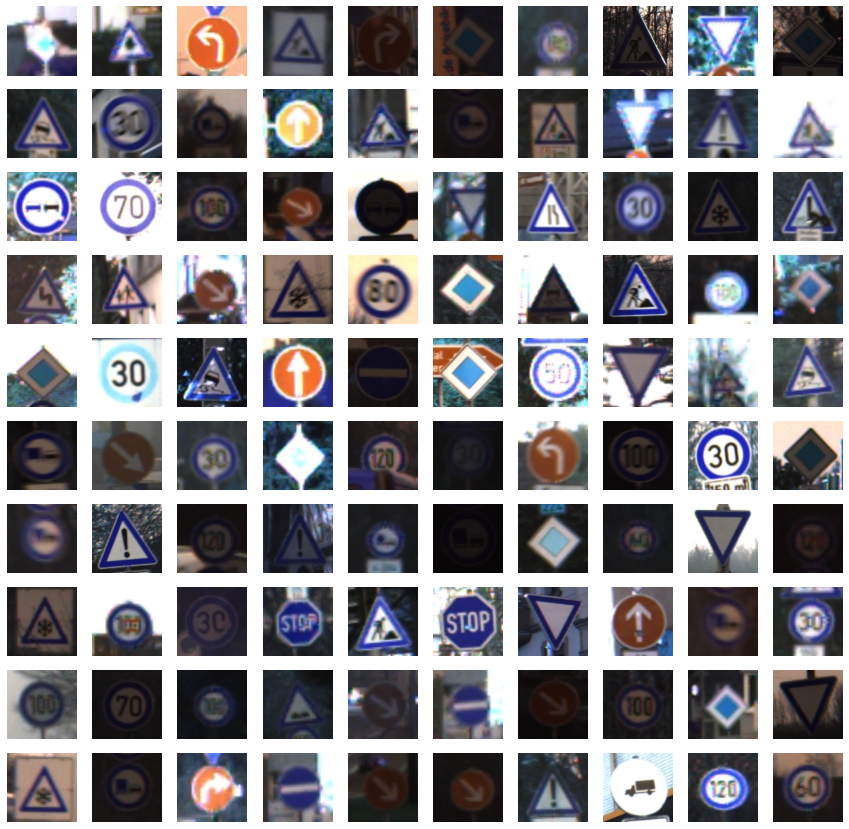

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import os

root = os.path.join('data','test_set')
plt.figure(figsize=([15, 15]))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  random_file=random.choice(os.listdir(root))
  img = cv2.imread(os.path.join(root, random_file))
  plt.imshow(cv2.resize(img, (200,200)))

##Votre classificateur